# Impact of correlation on patching effectiveness
In this notebook, we explore how the patching process differs in effectiveness when the offensive and defensive actors are correlated


In [1]:
%pylab inline
import circlesquare
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


We start with a single product, with an offensive actor (or team of actors) who seek vulnerabilities to hoard, and defensive actors, who seek vulnerabilities to patch.

In [2]:
model = circlesquare.CircleSquare()
model.make_pts(10000)

defense = model.new_interface('Defense')
defense.make_circles(max_area=.01)

offense = model.new_interface('Offense')
offense.make_circles(max_area=.01)

### Uncorrelated, pre-patch likelihood
Before getting started with any patching, lets draw the correlation plot to get a sense for how the two actors relate.

We see that there is no correlation between their liklihood of discovery, and the mean likelihood for each is relatively similar.

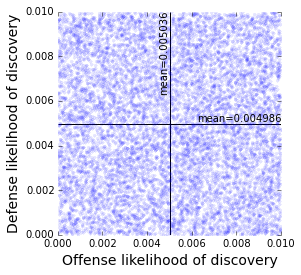

In [3]:
plt.figure(figsize=(4,4))
offense.plot_correlation(defense, lines=True, bounds=.01)

### Likelihood, through the patch process 
Now we'll simulate the patching process, and see how the likelihood of discovery changes between the two actors. We see that because the actors are not correlated in their likelihood of discovery, the offensive team has over twice the mean discovery likelihood.

In [4]:
output = []
for i in range(0,500,10):
    output.append({'round':i,
                   'defense':np.sum(defense.circles.area),
                   'offense':np.sum(offense.circles.area)})
    defense.harden(10)
    defense.update()
    offense.update()
df = pd.DataFrame(output).set_index('round')

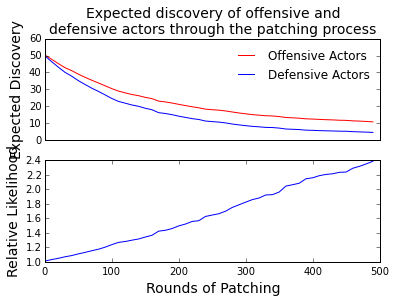

In [5]:
plt.subplot(2,1,1)
plt.title('Expected discovery of offensive and \ndefensive actors through the patching process', 
          fontsize=14)
plt.plot(df.index, df['offense'], 'r', label='Offensive Actors')
plt.plot(df.index, df['defense'], 'b', label='Defensive Actors')
plt.xticks([])
plt.ylabel('Expected Discovery', fontsize=14)
plt.legend(loc='upper right', frameon=False)

plt.subplot(2,1,2)
plt.plot(df.index, df['offense']/df['defense'])
plt.ylabel('Relative Likelihood', fontsize=14)
plt.xlabel('Rounds of Patching', fontsize=14)

### Uncorrelated post-patch likelihood

Looking again at the plot comparing each interface, we can see that the defensive actors have preferrentially patched their own low-hanging fruit. This shows why the offensive actors have an advantage in identifying the next vulnerability.

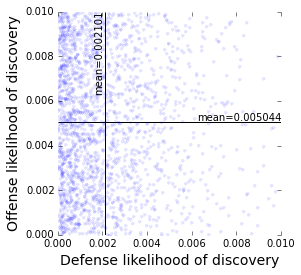

In [6]:
plt.figure(figsize=(4,4))
defense.plot_correlation(offense, lines=True, bounds=.01)

### Learn

We'll replicate the above analysis, this time having the two actors learn from one another before the simulation, in order to increase the correlation between them.

In [7]:
model = circlesquare.CircleSquare()
model.make_pts(10000)

defense = model.new_interface('Defense')
defense.make_circles(max_area=.01)

offense = model.new_interface('Offense')
offense.make_circles(max_area=.01)

#### Illustrate Learning

In the learning process, an actor is able to increase their likelihood of discovering points in proportion to the gain his opponent has over him in this scenario.

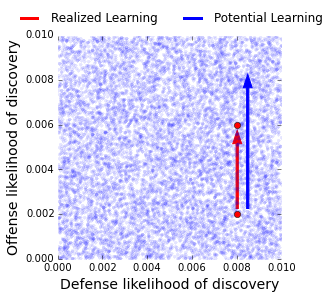

In [8]:
plt.figure(figsize=(4,4))
defense.plot_correlation(offense)
plt.plot(.008, .002, 'ro', linewidth=0)
plt.plot(.008, .006, 'ro', linewidth=0)
plt.arrow(.00803, .00225, 0, .0035, color='r', length_includes_head=True, 
          width=.0001, head_width=.0004, )

plt.arrow(.0085, .00225, 0, .006, color='b', length_includes_head=True, 
          width=.0001, head_width=.0004, )


plt.plot(np.nan,np.nan, 'r-', linewidth=3, label='Realized Learning')
plt.plot(np.nan,np.nan, 'b-', linewidth=3, label='Potential Learning')

plt.legend(frameon=False, loc='lower center', ncol=2, bbox_to_anchor=(.5,1))

In [9]:
for i in range(25):
    defense.learn(offense, .1, .5)
    offense.learn(defense, .1, .5)

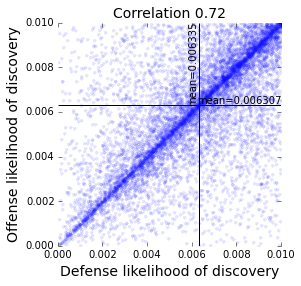

In [10]:
plt.figure(figsize=(4,4))
defense.plot_correlation(offense, lines=True, bounds=.01)
correlation, p = defense.get_correlation(offense)
plt.xlim(0, .01)
plt.ylim(0, .01)
plt.title('Correlation %.02f'%correlation, fontsize=14)

### Harden, after learning

In [11]:
output = []
for i in range(0,500,10):
    output.append({'round':i,
                   'defense':np.sum(defense.circles.area),
                   'offense':np.sum(offense.circles.area)})
    defense.harden(10)
    defense.update()
    offense.update()
df = pd.DataFrame(output).set_index('round')

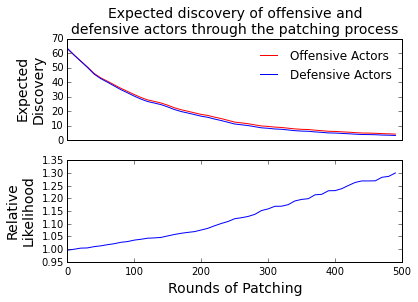

In [12]:
plt.subplot(2,1,1)
plt.title('Expected discovery of offensive and \ndefensive actors through the patching process', 
          fontsize=14)
plt.plot(df.index, df['offense'], 'r', label='Offensive Actors')
plt.plot(df.index, df['defense'], 'b', label='Defensive Actors')
plt.xticks([])
plt.ylabel('Expected\nDiscovery', fontsize=14)
plt.legend(loc='upper right', frameon=False)

plt.subplot(2,1,2)
plt.plot(df.index, df['offense']/df['defense'])
plt.ylabel('Relative\nLikelihood', fontsize=14)
plt.xlabel('Rounds of Patching', fontsize=14)

### Post-patch, post learning process

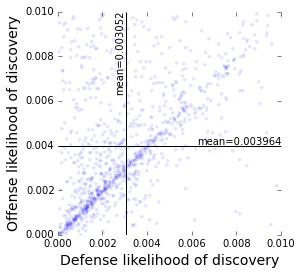

In [13]:
plt.figure(figsize=(4,4))
defense.update()
defense.plot_correlation(offense, lines=True, bounds=.01)
